In [48]:
import pandas as pd
import statsmodels.api as sm
from prince import MCA  # Install the prince library (pip install prince)
data=pd.read_csv("final_merged_df.csv")
data

#https://towardsdatascience.com/feature-selection-with-boruta-in-python-676e3877e596
# https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/

,Unnamed: 0.1,Isolation source,category,BioSample,sra_accession,country,Unnamed: 0,480,534,681,...,4629115,4629119,4637078,4759162,4766629,4787672,4817020,4817068,4845410,4851722
0,0.0,feces swine,swine,SAMN03576958,SRR2163243,kenya,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,feces swine,swine,SAMN03576962,SRR2163246,kenya,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,feces swine,swine,SAMN03576963,SRR2163247,kenya,2.0,3.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,feces swine,swine,SAMN03576956,SRR2163254,kenya,3.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,feces swine,swine,SAMN03576959,SRR2163255,kenya,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,Bovine faeces,bovine,SAMN33426671,SRR23603306,tunisia,83.0,0.0,4.0,0.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0
884,0.0,Bovine faeces,bovine,SAMN33426668,SRR23603307,tunisia,84.0,3.0,4.0,0.0,...,4.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,3.0,3.0
885,0.0,Bovine faeces,bovine,SAMN33426670,SRR23603308,tunisia,85.0,3.0,4.0,0.0,...,4.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,3.0,3.0
886,0.0,Bovine faeces,bovine,SAMN33426667,SRR23603309,tunisia,86.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Determine the optimal number of components

In [56]:
# %%time
# # Determine the optimal number of components using explained variance analysis
# # data=data.drop(columns=["Unnamed: 0"])
# # Extract the phenotype column
y = data['category']

# Extract SNP columns (excluding the phenotype column)
X = data.drop(columns=['category','Isolation source','BioSample','sra_accession','country',"Unnamed: 0"])
X=X.fillna(0)

# # Determine the optimal number of components using explained variance analysis

# # Determine the optimal number of components using explained variance analysis
# explained_variances = []
# component_range = range(1, len(snps.columns) + 1)  # Consider all possible components

# for n_components in component_range:
#     mca = MCA(n_components=n_components)
#     mca.fit(snps)
#     explained_variances.append(sum(mca.explained_inertia_ratio_))

# # Plot the explained variance vs. number of components
# plt.plot(component_range, explained_variances, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio vs. Number of Components (MCA)')
# plt.grid(True)
# plt.show()

# # Determine the best number of components based on the plot or a threshold
# best_n_components = component_range[explained_variances.index(max(explained_variances))]
# print("Best Number of Components:", best_n_components)

In [58]:
X=X.drop(columns=["Unnamed: 0.1"])
X

,480,534,681,1149,1242,1251,1410,1512,1602,1647,...,4629115,4629119,4637078,4759162,4766629,4787672,4817020,4817068,4845410,4851722
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,4.0,2.0,2.0,3.0,4.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,0.0,2.0,2.0,4.0,0.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.0,4.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,4.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0
884,3.0,4.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,3.0,3.0
885,3.0,4.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0,3.0,3.0
886,3.0,4.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Use ch-squre test

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate SelectKBest with k='all'
sf = SelectKBest(chi2, k='all')

# Fit the SelectKBest instance to your data
sf_fit = sf.fit(X, y)

# Uncomment this code for data visualization
# Create a DataFrame for visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sf_fit.scores_})

# Sort the DataFrame by scores in ascending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Create the bar plot
sns.barplot(data=feature_scores, x='Score', y='Feature', color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is a pandas Series or a NumPy array
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# use of Boruta

In [ ]:
# # use barut
# from sklearn.datasets import load_diabetes
# from sklearn.ensemble import RandomForestRegressor
# from boruta import BorutaPy
# import pandas as pd
# import numpy as np
# # initialize a RF model 
# model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# # let's initialize Boruta
# feat_selector = BorutaPy(
#     verbose=2,
#     estimator=model,
#     n_estimators='auto',
#     max_iter=10  # number of iterations to perform
# )

# # train Boruta
# # N.B.: X and y must be numpy arrays
# feat_selector.fit(np.array(X), np.array(y_encoded))

# # print support and ranking for each feature
# print("\n------Support and Ranking for each feature------")
# for i in range(len(feat_selector.support_)):
#     if feat_selector.support_[i]:
#         print("Passes the test: ", X.columns[i],
#               " - Ranking: ", feat_selector.ranking_[i])
#     else:
#         print("Doesn't pass the test: ",
#               X.columns[i], " - Ranking: ", feat_selector.ranking_[i])
k

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset here and assign it to X and y_encoded

# Initialize a RF model
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=2  # Number of iterations to perform
)

# Train Boruta
feat_selector.fit(np.array(X), np.array(y_encoded))

# Get the support status and ranking for each feature
support_status = feat_selector.support_
ranking = feat_selector.ranking_

# Get the column names of your features (assuming X is a DataFrame)
feature_names = X.columns

# Sort features based on their ranking (lower ranking is better)
sorted_features = [feature for _, feature in sorted(zip(ranking, feature_names))]

# Plot the top supported features (e.g., top 100)
top_n = 100
plt.figure(figsize=(12, 6))
plt.barh(sorted_features[:top_n], ranking[:top_n])
plt.xlabel('Boruta Ranking')
plt.ylabel('Features')
plt.title(f'Top {top_n} Supported Features')
plt.gca().invert_yaxis()
plt.show()


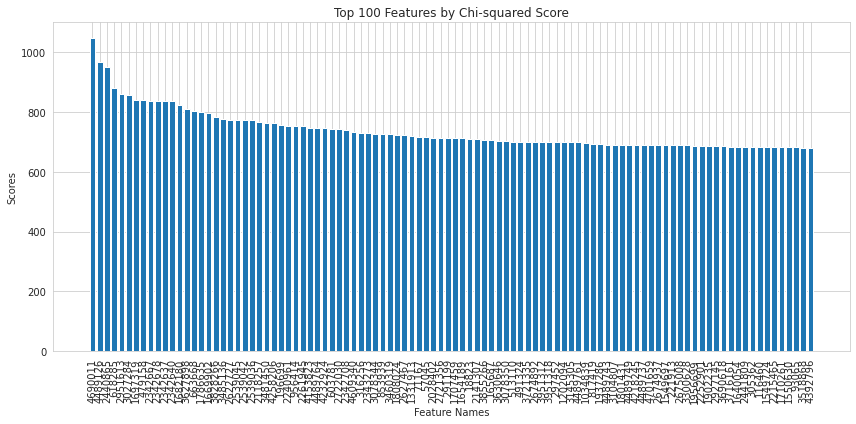

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data X and target variable y
# sf = SelectKBest(chi2, k='all')  # Keep all features initially

# Fit the feature selector to your data
sf_fit = sf.fit(X, y)

# Create a DataFrame to hold the feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sf_fit.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select the top 100 features
top_features = feature_scores.head(100)

# Create a bar plot for the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data X and target variable y
sf = SelectKBest(chi2, k='all')  # Keep all features initially

# Fit the feature selector to your data
sf_fit = sf.fit(X, y)

# Create a DataFrame to hold the feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sf_fit.scores_})

# Remove duplicates based on scores, keeping only the first occurrence
feature_scores = feature_scores.drop_duplicates(subset=['Score'])

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select the top 100 features
top_features = feature_scores.head(100)

# Create a bar plot for the top features
plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score (No Duplicates)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [95]:
# top_features=top_features.reset_index()
# top_features=top_features.drop(columns=["evel_0","index"])
top_features
# top_features.head(10).to_csv('top_10_features_chisqure_.csv', index=False)

,level_0,index,Feature,Score
0,0,34104,4690011,1048.161681
1,1,37493,4489126,966.948502
2,2,10104,2440865,950.375427
3,3,2855,618285,879.429970
4,4,11781,2951613,861.098855
...,...,...,...,...
95,95,124903,1710261,682.320819
96,96,102751,1550630,682.320819
97,97,95876,93065,682.147942
98,98,127313,3518868,680.290102


In [96]:
top_features.drop(columns=["level_0"])

,index,Feature,Score
0,34104,4690011,1048.161681
1,37493,4489126,966.948502
2,10104,2440865,950.375427
3,2855,618285,879.429970
4,11781,2951613,861.098855
...,...,...,...
95,124903,1710261,682.320819
96,102751,1550630,682.320819
97,95876,93065,682.147942
98,127313,3518868,680.290102


In [98]:
t=top_features.drop(columns=["index","level_0"])
t

,Feature,Score
0,4690011,1048.161681
1,4489126,966.948502
2,2440865,950.375427
3,618285,879.429970
4,2951613,861.098855
...,...,...
95,1710261,682.320819
96,1550630,682.320819
97,93065,682.147942
98,3518868,680.290102


In [99]:
t.to_csv("top_10_features_chisquare.csv",index=False)

# Dimentionality reduction Using MCA